# Overfitting
## In this lab, we are going to explore how thoughtfully choosing a model and using test set are important parts of avoiding overfitting. 

We are going to apply these concepts to a classification model. We want to develop a decision boundary, on one side of which we have class A and on the other we have class B.

Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever), and sucks only slightly less than overfitting. At least your model performs consistently bad :)


### First, we are going to generate some synthetic data. To make these concepts visual, we are going to generate this data to be concentric circles. Run the code below to do so. 

In [33]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

# Makin' some data
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

### As our classification algorithm, we are going to use a type of SVM with a radial basis function. This basically works by mapping each point into a higher dimensional space that can be split by the SVM (gross oversimplificaiton). That looks something like this:
![RBFSVM.png](../images/RBFSVM.png)

### We can change thecomplexity of the decision boundaries applied by the SVM by changing the size of the radial basis function, through the parameter 'gamma'.

Instantiate a list of three SVM classifiers with three different gamma parameters, (.001, 1, and 20). Use *SVC* (Support Vector Classification) ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)).
Assign the list of classifiers to the variable *classifiers*.

In [34]:
# Your code here
from sklearn.svm import SVC
classifiers = [SVC(gamma=.001), SVC(gamma=1), SVC(gamma=20)]


### Now, we are going to plot the boundaries created by each of these classifiers with the points we generated. Run the following code to make three graphs of each SVM classifier.

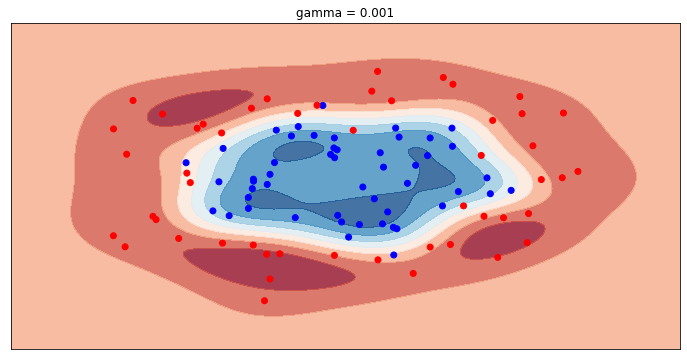

In [32]:
from matplotlib.colors import ListedColormap

figure = plt.figure(figsize=(12, 6))
i = 1
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
names = ['gamma = 0.001', 'gamma = 1', 'gamma = 20']

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(1, len(classifiers), i)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name)
    i += 1
plt.show()

### Where the contour is red, we will predict red, and same for blue; white means there is a 50/50 chance of either class
Explain what you see in the plots above.

Which gamma do you think fits the data best? 

What would you select as the optimal gamma?

In [15]:
# Your response here
#the gamma of 0.001 is a typcial case of overfitting there are way to many red dots which are still in the blue part
#the gamme of one looks better but still with some blues in red and the other way around
#the third one tends to do an underfitting because some spots could be included in the outer red part,as it is still quit eprecise I would choose a gamma at around 10

### Without having used a training and testing set, lets see what our accuracy score would be for, for example, a gamma of .7.
Instantiate a new SVC with that gamma, and fit the entire dataset (X, y). Use the .score() method of the SVC model to calculate the accuracy score of all the trained data.

In [43]:
# Your code here
classifiers = [SVC(gamma=7)]
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(gamma=7))

clf.score(X, y)

0.96

### Wow thats good accuracy! But is it generalizable? Make a test/train split and see how the model performs on the SVM with the gamma of 20. 

In [50]:
# Your code here
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Your code here:
from sklearn.model_selection import train_test_split




In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [52]:
clf2 = make_pipeline(StandardScaler(), SVC(gamma=20))

In [55]:
clf2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC(gamma=20))])

In [58]:
y_pred_train = clf2.predict(X_train)

In [60]:
ascor = accuracy_score(y_train,y_pred_train)
ascor

0.9875

In [61]:
y_pred_test = clf2.predict(X_test)

In [63]:
ascor1 = accuracy_score(y_test,y_pred_test)
ascor1

0.9

### Try with some of the other gammas to see how the accuracy score changes after implementing a test/train split. 

In [69]:
# Your code here
from sklearn.model_selection import cross_val_score
gammas = [0.5, 2, 4, 8, 12, 24, 50,  100, 200, 300, 400]
for g in gammas:
    clf2 = make_pipeline(StandardScaler(), SVC(gamma=g))
    clf2.fit(X_train, y_train)
    y_pred_train = clf2.predict(X_train)
    ascor = accuracy_score(y_train,y_pred_train)
    y_pred_test = clf2.predict(X_test)
    ascor1 = accuracy_score(y_test,y_pred_test)
    print("Gamma:",g) 
    print("Train accuracy:",ascor)
    print("Test accuracy:",ascor1)
#gamma, train, test accuracy

Gamma: 0.5
Train accuracy: 0.9
Test accuracy: 0.95
Gamma: 2
Train accuracy: 0.925
Test accuracy: 0.95
Gamma: 4
Train accuracy: 0.9375
Test accuracy: 1.0
Gamma: 8
Train accuracy: 0.9625
Test accuracy: 1.0
Gamma: 12
Train accuracy: 0.975
Test accuracy: 1.0
Gamma: 24
Train accuracy: 0.9875
Test accuracy: 0.9
Gamma: 50
Train accuracy: 0.9875
Test accuracy: 0.85
Gamma: 100
Train accuracy: 1.0
Test accuracy: 0.7
Gamma: 200
Train accuracy: 1.0
Test accuracy: 0.6
Gamma: 300
Train accuracy: 1.0
Test accuracy: 0.55
Gamma: 400
Train accuracy: 1.0
Test accuracy: 0.55


### Was your previous model overfitting? If so, how would you try to improve this model to prevent this?

In [19]:
# Your response here
#do not take too high gamma